In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Datasets/zoo (1).csv')

In [8]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['animal'], drop_first=True)

# Remove 'uniq_id' as it's not a relevant feature
X = df_encoded.drop(['water_need', 'uniq_id'], axis=1)
y = df_encoded['water_need']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf_clf = RandomForestRegressor(random_state=42)
dt_clf = DecisionTreeRegressor(random_state=42)

rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
from sklearn.metrics import mean_absolute_error

rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Decision Tree Regressor MAE: {dt_mae}")

Random Forest Regressor MAE: 54.966619047619034
Decision Tree Regressor MAE: 55.333333333333336


In [11]:
print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Decision Tree Regressor MAE: {dt_mae}")

if rf_mae < dt_mae:
    print("Random Forest Regressor performed better than Decision Tree Regressor.")
elif dt_mae < rf_mae:
    print("Decision Tree Regressor performed better than Random Forest Regressor.")
else:
    print("Both Random Forest Regressor and Decision Tree Regressor performed equally.")

Random Forest Regressor MAE: 54.966619047619034
Decision Tree Regressor MAE: 55.333333333333336
Random Forest Regressor performed better than Decision Tree Regressor.


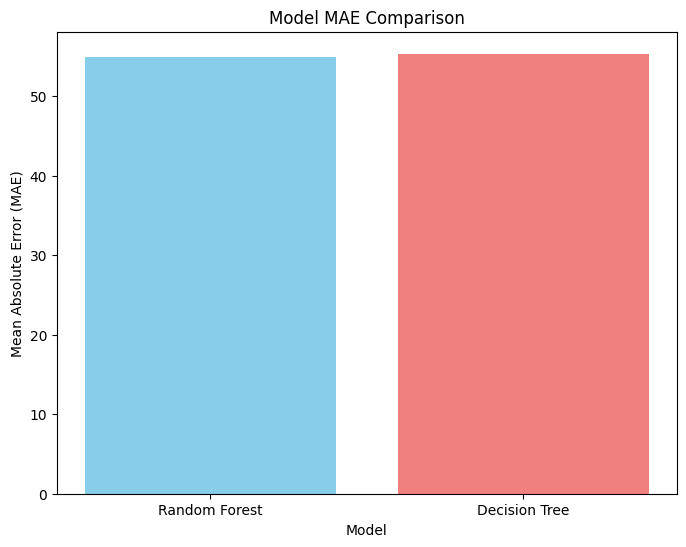

In [12]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'Decision Tree']
accuracy_scores = [rf_mae, dt_mae] # Use MAE scores instead of accuracy

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral'])
plt.title("Model MAE Comparison") # Update title to reflect MAE
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)") # Update y-axis label
# The y-axis limit should be adjusted based on the range of MAE values, or removed for automatic scaling.
# plt.ylim(0, 1.0) # Remove or adjust y-axis limit as MAE can be greater than 1.0
plt.show()